<a href="https://colab.research.google.com/github/geekysharzeel/-Technocolabs-Internship-Project/blob/main/OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [144]:
import pytesseract
from google.colab.patches import cv2_imshow
import shutil
import cv2
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

In [125]:
from google.colab import files
uploaded = files.upload()

creating rectangles around letters

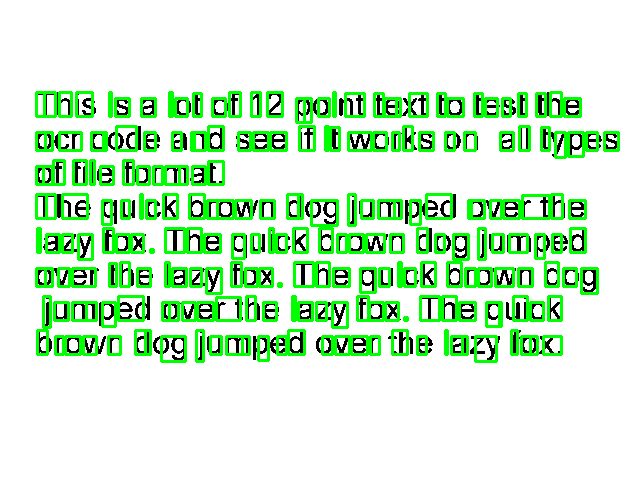

-1

In [142]:
h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) 
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2_imshow(img)
cv2.waitKey(0)

creating boxes around words

In [138]:
from pytesseract import Output
img1 = cv2.imread('test.png')

d = pytesseract.image_to_data(img1, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


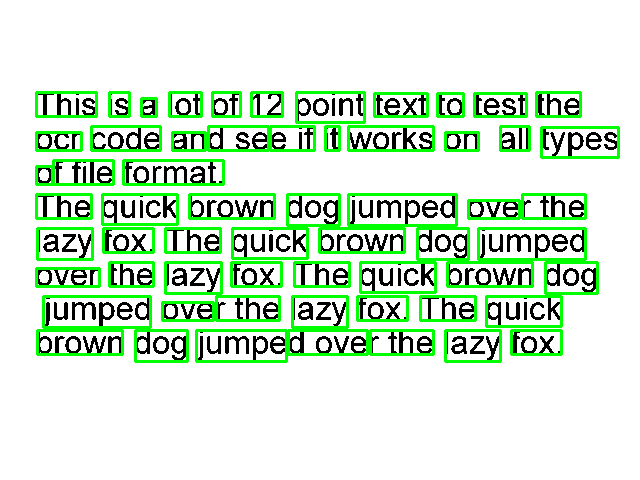

-1

In [141]:

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img1 = cv2.rectangle(img1, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(img1)
cv2.waitKey(0)

In [145]:
image_path_in_colab="test.png"
extractedInformation = pytesseract.image_to_string(Image.open(image_path_in_colab))
print(extractedInformation)


This is a lot of 12 point text to test the
ocr code and see if it works on all types
of file format.

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.



displaying the images

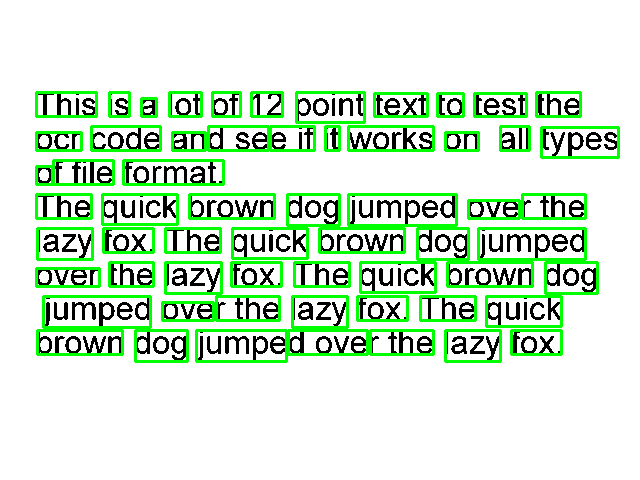

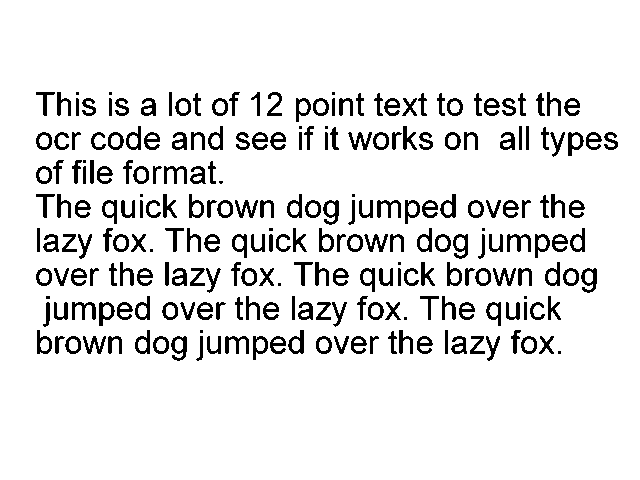

In [151]:
from IPython.display import Image
cv2_imshow(img1)
Image("test.png")